In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn.linear_model import Ridge


In [2]:
train_df = pd.read_csv('./datasets/train_df.csv')
test_df = pd.read_csv('./datasets/test_df.csv')
df = pd.read_csv('./datasets/test.csv')
misc = pd.read_csv('./datasets/train.csv')

In [3]:
df

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1662,527377110,60,RL,80.0,8000,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,11,2007,WD
874,1234,535126140,60,RL,90.0,14670,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,MnPrv,NaN,0,8,2008,WD
875,1373,904100040,20,RL,55.0,8250,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2008,WD
876,1672,527425140,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,GdWo,NaN,0,5,2007,WD


In [4]:
train_df

,Unnamed: 0,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,...,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,saleprice.1
0,0,1,3,3,6,8,3,4,4,2,...,2,1,3,1,6,0,1976.0,2.0,475.0,130500
1,1,1,3,3,7,5,3,5,4,2,...,2,1,4,1,8,1,1997.0,2.0,559.0,220000
2,2,4,3,3,5,7,4,4,4,2,...,1,0,3,1,5,0,1953.0,1.0,246.0,109000
3,3,4,3,3,5,5,3,5,4,2,...,2,1,3,1,7,0,2007.0,2.0,400.0,174000
4,4,1,3,3,6,8,3,3,5,2,...,2,0,3,1,6,0,1957.0,2.0,484.0,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,2046,1,3,3,8,5,3,5,4,4,...,2,0,3,1,7,1,2007.0,2.0,520.0,298751
2047,2047,1,3,3,4,5,3,4,4,2,...,1,0,1,1,4,0,1961.0,2.0,539.0,82500
2048,2048,4,3,3,6,6,3,4,4,2,...,1,1,3,1,9,1,1929.0,2.0,342.0,177000
2049,2049,4,3,3,4,5,3,4,4,2,...,1,0,3,1,6,2,1956.0,1.0,294.0,144000


In [5]:
test_df

,Unnamed: 0,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,...,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area
0,0,4,3,3,6,8,2,3,4,2,...,0,2,0,4,2,9,0,1910.0,1,440
1,1,1,3,3,5,4,3,5,4,2,...,0,2,0,6,2,10,0,1977.0,2,580
2,2,1,3,3,7,5,3,5,5,4,...,0,2,1,3,1,7,1,2006.0,2,426
3,3,4,3,3,5,6,3,4,4,2,...,0,1,0,2,1,5,0,1935.0,2,480
4,4,1,3,3,6,5,3,5,4,2,...,0,1,1,3,1,6,2,1963.0,2,514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,873,4,3,3,6,6,3,4,4,2,...,0,2,1,4,1,8,1,1974.0,2,488
874,874,4,3,3,6,7,4,4,4,2,...,0,2,1,4,1,9,1,1966.0,2,480
875,875,4,3,3,5,5,3,4,4,2,...,0,1,0,3,1,5,1,1968.0,1,322
876,876,4,3,3,4,6,3,4,4,2,...,0,1,0,3,1,5,0,1974.0,2,528


In [6]:
train_df.drop(columns=['Unnamed: 0'], inplace=True)
test_df.drop(columns=['Unnamed: 0'], inplace=True)


In [7]:
train_df.columns = train_df.columns.str.lower().str.replace(' ', '_')
test_df.columns = test_df.columns.str.lower().str.replace(' ', '_')

In [8]:
train_df['sale_price'] = train_df['saleprice.1']

In [9]:
train_df.columns

Index(['lot_shape', 'utilities', 'land_slope', 'overall_qual', 'overall_cond',
       'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1',
       ...
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd',
       'fireplaces', 'garage_yr_blt', 'garage_cars', 'garage_area',
       'saleprice.1', 'sale_price'],
      dtype='object', length=187)

In [10]:
train_df.drop(columns=['saleprice.1'], inplace=True)

In [11]:
train_df.columns

Index(['lot_shape', 'utilities', 'land_slope', 'overall_qual', 'overall_cond',
       'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1',
       ...
       'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr',
       'totrms_abvgrd', 'fireplaces', 'garage_yr_blt', 'garage_cars',
       'garage_area', 'sale_price'],
      dtype='object', length=186)

In [12]:
test_df

,lot_shape,utilities,land_slope,overall_qual,overall_cond,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,...,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area
0,4,3,3,6,8,2,3,4,2,2,...,0,2,0,4,2,9,0,1910.0,1,440
1,1,3,3,5,4,3,5,4,2,2,...,0,2,0,6,2,10,0,1977.0,2,580
2,1,3,3,7,5,3,5,5,4,7,...,0,2,1,3,1,7,1,2006.0,2,426
3,4,3,3,5,6,3,4,4,2,2,...,0,1,0,2,1,5,0,1935.0,2,480
4,1,3,3,6,5,3,5,4,2,5,...,0,1,1,3,1,6,2,1963.0,2,514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,4,3,3,6,6,3,4,4,2,6,...,0,2,1,4,1,8,1,1974.0,2,488
874,4,3,3,6,7,4,4,4,2,5,...,0,2,1,4,1,9,1,1966.0,2,480
875,4,3,3,5,5,3,4,4,2,5,...,0,1,0,3,1,5,1,1968.0,1,322
876,4,3,3,4,6,3,4,4,2,6,...,0,1,0,3,1,5,0,1974.0,2,528


In [13]:
test_df.columns

Index(['lot_shape', 'utilities', 'land_slope', 'overall_qual', 'overall_cond',
       'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1',
       ...
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'totrms_abvgrd', 'fireplaces', 'garage_yr_blt',
       'garage_cars', 'garage_area'],
      dtype='object', length=176)

## EDA


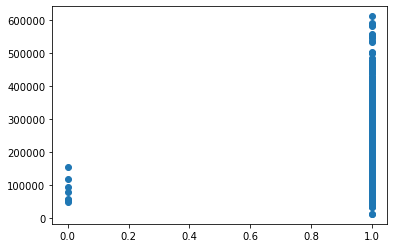

In [14]:
plt.scatter(train_df['street_pave'],train_df['sale_price'] )

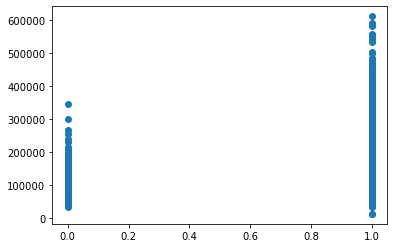

In [15]:
plt.scatter(train_df['alley_no_alley'],train_df['sale_price'] )

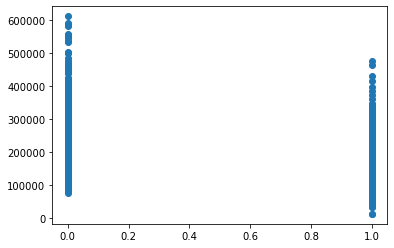

In [16]:
plt.scatter(train_df['mas_vnr_type_none'],train_df['sale_price'] )

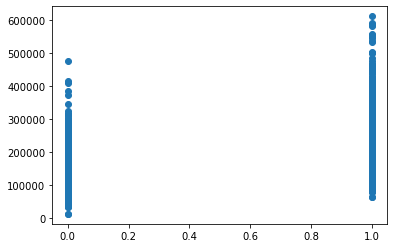

In [17]:
plt.scatter(train_df['foundation_pconc'],train_df['sale_price'] )

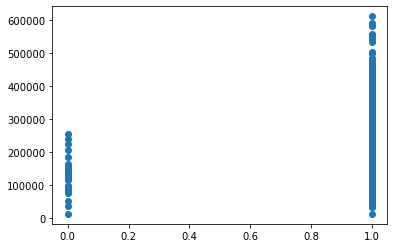

In [18]:
plt.scatter(train_df['heating_gasa'],train_df['sale_price'] )

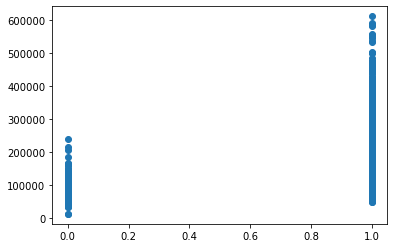

In [19]:
plt.scatter(train_df['central_air_y'],train_df['sale_price'] )

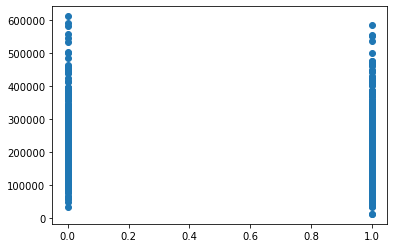

In [20]:
plt.scatter(train_df['sale_type_wd_'],train_df['sale_price'] )

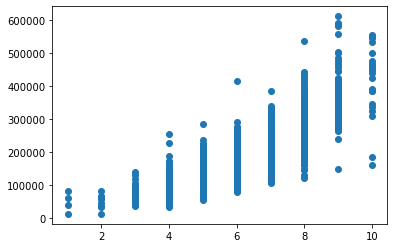

In [21]:
plt.scatter(train_df['overall_qual'],train_df['sale_price'] )

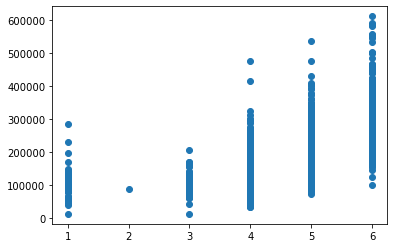

In [22]:
plt.scatter(train_df['bsmt_qual'],train_df['sale_price'] )

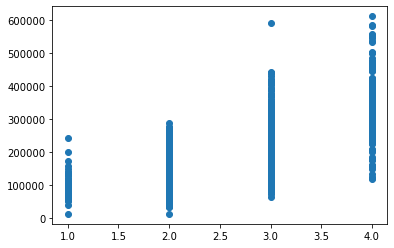

In [23]:
plt.scatter(train_df['kitchen_qual'],train_df['sale_price'] )

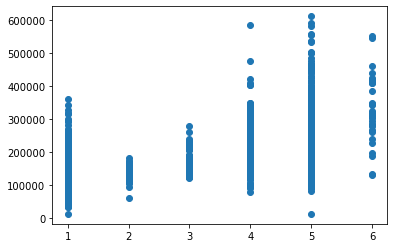

In [24]:
plt.scatter(train_df['fireplace_qu'],train_df['sale_price'] )

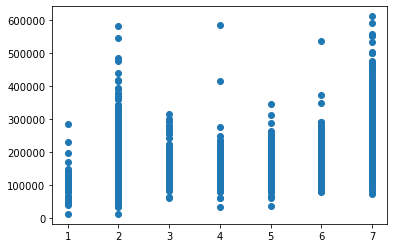

In [25]:
plt.scatter(train_df['bsmtfin_type_1'],train_df['sale_price'] )

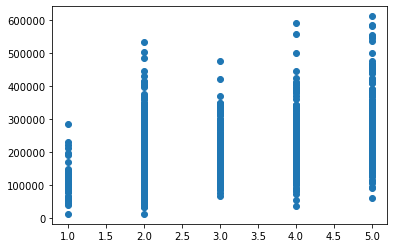

In [26]:
plt.scatter(train_df['bsmt_exposure'],train_df['sale_price'] )

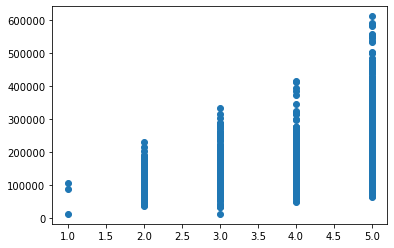

In [27]:
plt.scatter(train_df['heating_qc'],train_df['sale_price'] )

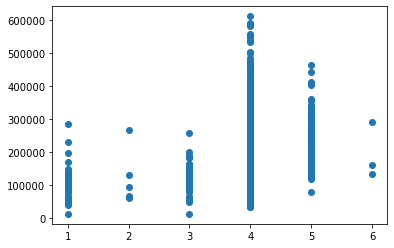

In [28]:
plt.scatter(train_df['bsmt_cond'],train_df['sale_price'] )

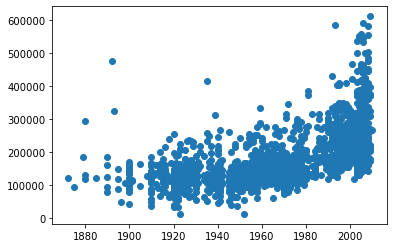

In [29]:
plt.scatter(train_df['year_built'],train_df['sale_price'] )

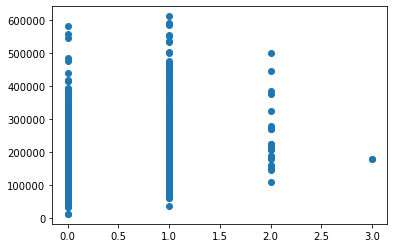

In [30]:
plt.scatter(train_df['bsmt_full_bath'],train_df['sale_price'] )

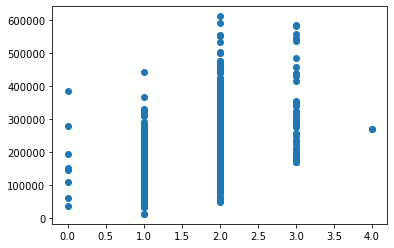

In [31]:
plt.scatter(train_df['full_bath'],train_df['sale_price'] )

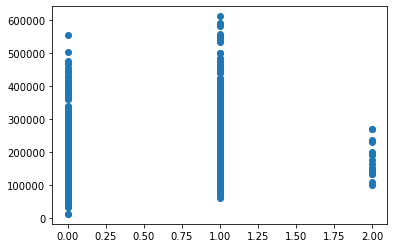

In [32]:
plt.scatter(train_df['half_bath'],train_df['sale_price'] )

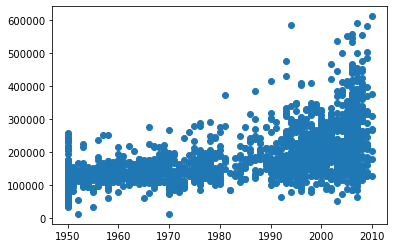

In [33]:
plt.scatter(train_df['year_remod/add'],train_df['sale_price'] )

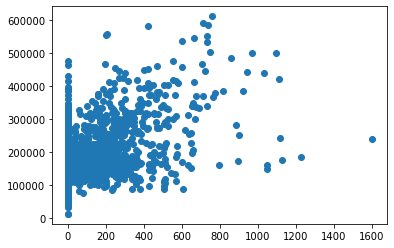

In [34]:
plt.scatter(train_df['mas_vnr_area'],train_df['sale_price'] )

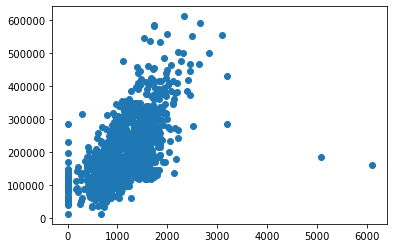

In [35]:
plt.scatter(train_df['total_bsmt_sf'],train_df['sale_price'] )

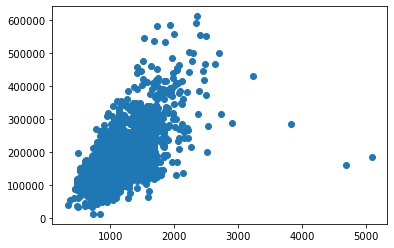

In [36]:
plt.scatter(train_df['1st_flr_sf'],train_df['sale_price'] )

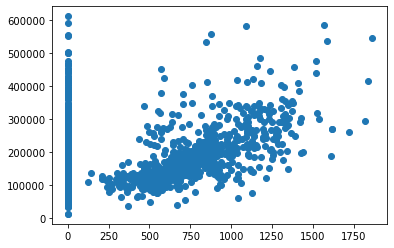

In [37]:
plt.scatter(train_df['2nd_flr_sf'],train_df['sale_price'] )

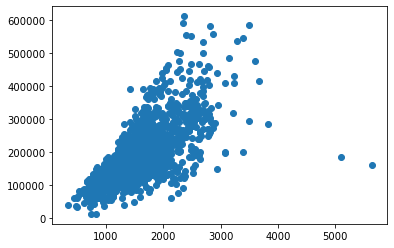

In [38]:
plt.scatter(train_df['gr_liv_area'],train_df['sale_price'] )

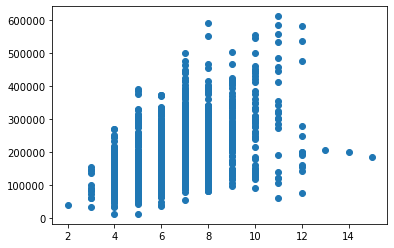

In [39]:
plt.scatter(train_df['totrms_abvgrd'],train_df['sale_price'] )

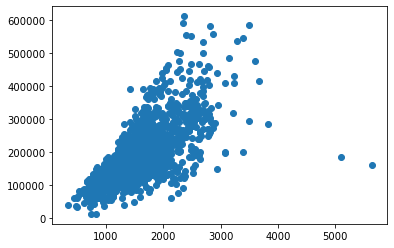

In [40]:
plt.scatter(train_df['gr_liv_area'],train_df['sale_price'] )

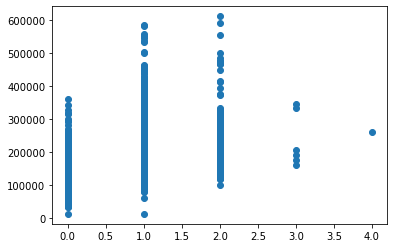

In [41]:
plt.scatter(train_df['fireplaces'],train_df['sale_price'] )

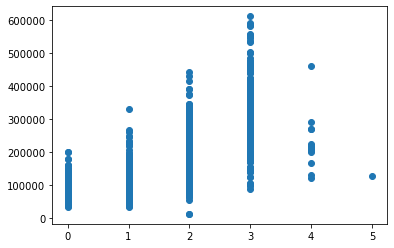

In [42]:
plt.scatter(train_df['garage_cars'],train_df['sale_price'] )

In [43]:
train_df['1st_and_2nd'] = train_df['1st_flr_sf'] + train_df['2nd_flr_sf']


In [44]:
test_df['1st_and_2nd'] = test_df['1st_flr_sf'] + test_df['2nd_flr_sf']

In [45]:
train_df['alt_housing_options']= train_df['bldg_type_2fmcon'] + train_df['bldg_type_duplex'] + train_df['bldg_type_twnhs'] + train_df['bldg_type_twnhse']

In [46]:
test_df['alt_housing_options']= test_df['bldg_type_2fmcon'] + test_df['bldg_type_duplex'] + test_df['bldg_type_twnhs'] + test_df['bldg_type_twnhse']

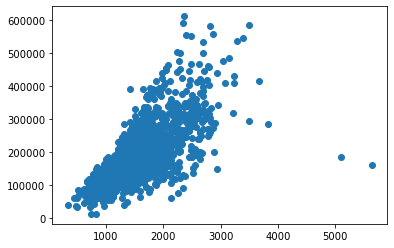

In [47]:
plt.scatter(train_df['1st_and_2nd'],train_df['sale_price'] )

In [48]:
train_df = train_df[train_df['1st_and_2nd'] < 4000]


In [49]:
print(test_df.shape, train_df.shape)

(878, 178) (2049, 188)


In [50]:
test_df.columns

Index(['lot_shape', 'utilities', 'land_slope', 'overall_qual', 'overall_cond',
       'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1',
       ...
       'half_bath', 'bedroom_abvgr', 'kitchen_abvgr', 'totrms_abvgrd',
       'fireplaces', 'garage_yr_blt', 'garage_cars', 'garage_area',
       '1st_and_2nd', 'alt_housing_options'],
      dtype='object', length=178)

In [51]:
train_df['alt_housing_options'].unique()

array([0, 1], dtype=int64)

In [52]:
corr = train_df[['street_pave', 'central_air_y', 'bsmt_qual', 'kitchen_qual', 
             'fireplace_qu','bsmt_exposure', 'heating_qc', 
             'bsmt_cond', 'year_built', 'bsmt_full_bath', 'full_bath', 
             'year_remod/add', 'mas_vnr_area', 'total_bsmt_sf', 
             '1st_and_2nd', 'gr_liv_area', 'garage_cars','sale_price']]

## Model it 

In [53]:

X = train_df[['street_pave', 'central_air_y', 'overall_qual', 'bsmt_qual', 'kitchen_qual', 
             'fireplace_qu','bsmt_exposure', 'heating_qc', 
             'year_built', 'bsmt_full_bath', 'full_bath', 
             'year_remod/add', 'mas_vnr_area', 'total_bsmt_sf', 
             '1st_and_2nd', 'gr_liv_area', 'garage_cars', 
            'alt_housing_options']]
y = train_df['sale_price']


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.25,
                                                    random_state = 42)

In [55]:
# Nominal features that matter 
#'street_pave', 'ms_zoning_rl', 'alley_no_alley', 'land_contour_lvl', 'condition_1_norm',
 #           'bldg_type_1fam', 'roof_style_gable', 'roof_matl_compshg', 'mas_vnr_type_none',
  #         'foundation_cblock','foundation_pconc', 'heating_gasa', 'central_air_y', 'garage_type_attchd', 
   #        'sale_type_wd_'

# Create poly features 

In [56]:
#poly = PolynomialFeatures(2, interaction_only=True)


In [57]:
#P_train = poly.fit_transform(X_train)

In [58]:
#P_test = poly.fit_transform(X_test)

In [59]:
#P_train.shape

# SCALE

In [60]:
# variaable for scaling my test data set 
XX = test_df[['street_pave', 'central_air_y', 'overall_qual', 'bsmt_qual', 'kitchen_qual', 
             'fireplace_qu','bsmt_exposure', 'heating_qc', 
             'year_built', 'bsmt_full_bath', 'full_bath', 
             'year_remod/add', 'mas_vnr_area', 'total_bsmt_sf', 
             '1st_and_2nd', 'gr_liv_area', 'garage_cars', 
            'alt_housing_options']]

In [61]:
# variable for scaling alternative feature selelections
#XXX = train_df[['alley_no_alley','roof_matl_compshg', 'mas_vnr_type_none',
         #   'foundation_pconc', 'central_air_y', 
          # 'sale_type_wd_', 'overall_qual', 'bsmt_qual', 'kitchen_qual', 
           #  'fireplace_qu','bsmt_exposure', 'heating_qc', 
            # 'bsmt_cond', 'year_built', 'bsmt_full_bath', 'full_bath', 
             ##'1st_and_2nd', 'gr_liv_area', 'garage_cars']]

In [62]:
sc = StandardScaler()


In [63]:
Z_train = sc.fit_transform(X_train) 

In [64]:
Z_test = sc.transform(X_test)

In [65]:
# scale test_df for kaggle
zz_test = sc.transform(XX)

# Model

In [66]:
lr = LinearRegression()



In [67]:
lr.fit(Z_train, y_train)

LinearRegression()

In [68]:
lr.score(Z_train, y_train)

0.8638700254714737

In [69]:
lr.score(Z_test, y_test)

0.8739604061218293

In [70]:
y_pred = lr.predict(Z_test)
y_pred

array([110342.79930885, 273457.47062686, 117441.333443  , 130025.34401215,
       106813.83188349, 274646.22655299, 196068.63000281, 197517.15387741,
       265328.81404719, 151986.55654393, 212214.98267638, 291397.69762342,
       104372.57868597, 124962.59082025, 260864.77666641,  75193.3060248 ,
       239368.91649229, 203541.42164232, 113942.64087412, 273601.19705765,
       169337.19288665, 102032.45069304, 122536.94630216, 231705.62580883,
       152966.55653643, 163253.79751001, 101629.50030228, 214341.13793012,
       208887.49023096, 109662.23999976, 109648.78875568, 212405.42208748,
       141080.98317037, 236190.97319974, 123169.66652689, 283461.56306987,
       204445.54101742, 151179.27456395, 134320.91479974, 133234.920778  ,
       178762.56201432, 206994.99069598, 107235.0429141 , 133036.41474825,
       256973.25910618, 114419.12084373, 186436.75393208, 183301.696852  ,
       103045.48113276, 118950.06583038, 111772.21526115, 133670.93436507,
       191847.89048104,  

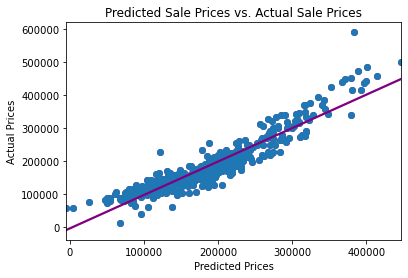

In [71]:
# preds vs actual plot 
sns.regplot(y_pred, y_test, color='purple', ci=None)

#plt.scatter(y_pred, y_test, c='purple', )
plt.xlabel('Predicted Prices')
plt.ylabel('Actual Prices')
plt.title('Predicted Sale Prices vs. Actual Sale Prices')
plt.scatter(y_pred, y_test)

In [72]:
# calculate resids from my train set 
y_train_pred = lr.predict(Z_train)

In [73]:
# rmse of test data
rmse = mean_squared_error(y_test, y_pred)
rmse**.5

28228.29700527099

In [74]:
# rmse of train data 
rmse = mean_squared_error(y_train, y_train_pred)
rmse**.5

29220.681678887016

In [75]:
# kaggle predictions for submission
kaggle_pred = lr.predict(zz_test)
kaggle_pred

array([145329.06547068, 194460.92383804, 239614.45162155, 121757.75012828,
       207331.03923025,  89647.45225057, 116118.70963221, 181112.12934272,
       201485.97253024, 168797.08670772, 167597.94946599, 140664.18392154,
       181338.41853646, 291665.46862221, 187982.42586242, 132981.65052696,
       145013.18442212, 138005.37868985, 216563.51332386, 216028.50887599,
       182332.73982892, 133438.48087383, 221803.23371354, 186148.50880346,
       207710.37406571, 128009.70449224, 147523.33719826, 171901.45377879,
       202530.26187859,  51559.00248036, 101433.3205402 , 100621.51842119,
       283030.40936522, 174284.6586445 , 246861.34886089, 201193.37167037,
       140723.88443706,  86366.68254895, 132927.12281247, 212404.67785388,
       176424.77793763, 235266.53281751, 184446.89664117, 172081.85599165,
       252044.2477771 , 109287.46155406, 258341.1404338 , 130638.68394282,
       136764.96387533, 135562.31470015, 125884.06351337, 218541.24596612,
       286609.08653548, 1

In [76]:
# create column for submission 
test_df['SalePrice'] = kaggle_pred
test_df['Id'] = df['Id']
test_df

,lot_shape,utilities,land_slope,overall_qual,overall_cond,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,...,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,1st_and_2nd,alt_housing_options,SalePrice,Id
0,4,3,3,6,8,2,3,4,2,2,...,2,9,0,1910.0,1,440,1928,1,145329.065471,2658
1,1,3,3,5,4,3,5,4,2,2,...,2,10,0,1977.0,2,580,1967,1,194460.923838,2718
2,1,3,3,7,5,3,5,5,4,7,...,1,7,1,2006.0,2,426,1496,0,239614.451622,2414
3,4,3,3,5,6,3,4,4,2,2,...,1,5,0,1935.0,2,480,968,0,121757.750128,1989
4,1,3,3,6,5,3,5,4,2,5,...,1,6,2,1963.0,2,514,1394,0,207331.039230,625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,4,3,3,6,6,3,4,4,2,6,...,1,8,1,1974.0,2,488,1877,0,212569.794253,1662
874,4,3,3,6,7,4,4,4,2,5,...,1,9,1,1966.0,2,480,1988,0,248576.192419,1234
875,4,3,3,5,5,3,4,4,2,5,...,1,5,1,1968.0,1,322,1211,0,147115.482151,1373
876,4,3,3,4,6,3,4,4,2,6,...,1,5,0,1974.0,2,528,864,0,108516.870421,1672


In [77]:
kaggle_submission = test_df[['Id','SalePrice']].copy()

In [78]:
kaggle_submission

,Id,SalePrice
0,2658,145329.065471
1,2718,194460.923838
2,2414,239614.451622
3,1989,121757.750128
4,625,207331.039230
...,...,...
873,1662,212569.794253
874,1234,248576.192419
875,1373,147115.482151
876,1672,108516.870421


In [79]:
kaggle_submission.to_csv('./submission/kaggle_submission.csv', index=False)

# Analysis 

In [80]:
pd.DataFrame(list(zip(X.columns, lr.coef_)))

,0,1
0,street_pave,785.457530
1,central_air_y,-1824.769349
2,overall_qual,16997.448583
3,bsmt_qual,-1343.648396
4,kitchen_qual,11270.228417
5,fireplace_qu,4856.242067
6,bsmt_exposure,7511.783574
7,heating_qc,2228.510015
8,year_built,7557.800112
9,bsmt_full_bath,6391.243096


# Regularize

In [81]:
ridge_model = Ridge(alpha=10)


In [82]:
ridge_model.fit(Z_train, y_train)


Ridge(alpha=10)

In [83]:
print(ridge_model.score(Z_train, y_train))
print(ridge_model.score(Z_test, y_test))

0.8638618810127175
0.8738650101327905


In [84]:
r_alphas = np.logspace(0, 5, 100)


In [85]:
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)


In [86]:
ridge_cv = ridge_model.fit(Z_train, y_train)


In [87]:
ridge_cv.alpha


10

In [88]:
test_df['saleprice'] = ridge_model.predict(XX)

In [89]:
l_alphas = np.logspace(-3, 0, 100)


In [90]:
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=5000)


In [91]:
lasso_cv.fit(Z_train, y_train);


In [92]:
lasso_cv.alpha_


1.0

In [93]:
print(lasso_cv.score(Z_train, y_train))
print(lasso_cv.score(Z_test, y_test))

0.8638699809054716
0.8739644087161516


# Extra EDA and Analysis

Text(0.5, 1.0, 'Square Feet of Basement vs Sale Price')

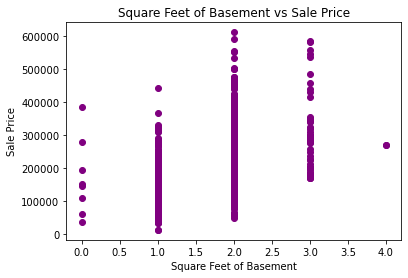

In [94]:
plt.scatter(train_df['full_bath'], train_df['sale_price'], c='purple', )
plt.xlabel('Square Feet of Basement')
plt.ylabel('Sale Price')
plt.title('Square Feet of Basement vs Sale Price')

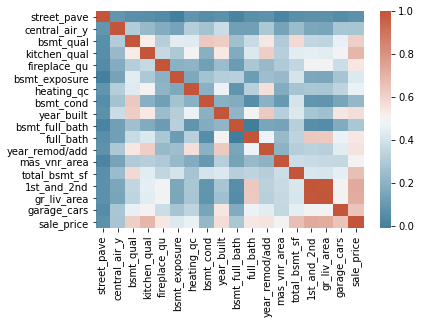

In [95]:
correlation = corr.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation, cmap=cmap)

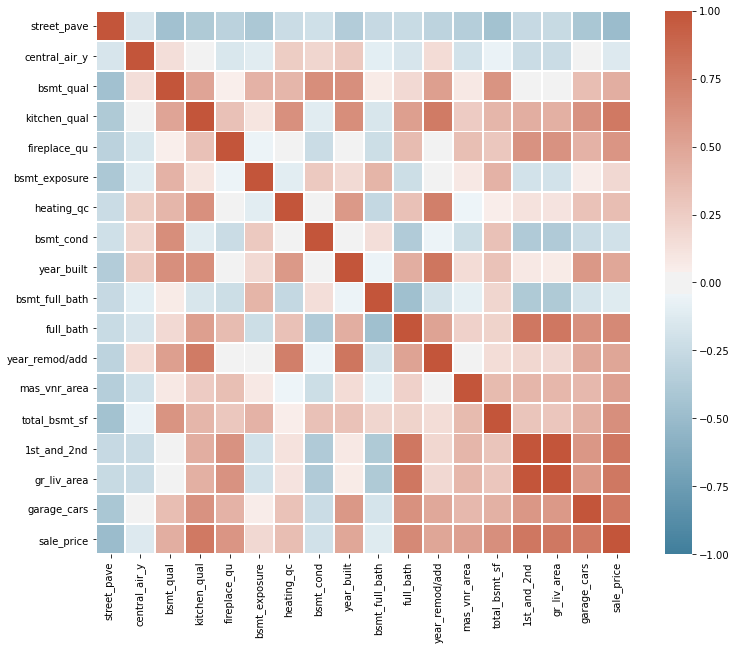

In [96]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation.corr(), cmap=cmap, vmin=-1, vmax=1, linewidths=1);

In [97]:
building_type_df = train_df[['bldg_type_1fam','bldg_type_2fmcon', 'bldg_type_duplex', 'bldg_type_twnhs', 'bldg_type_twnhse', 'sale_price']]

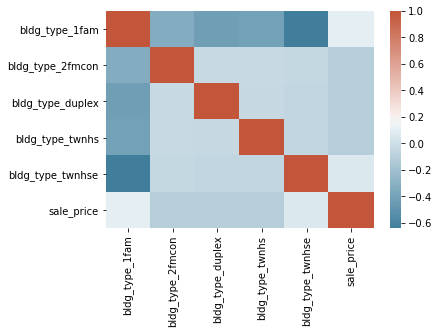

In [98]:
correlation = building_type_df.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation, cmap=cmap)

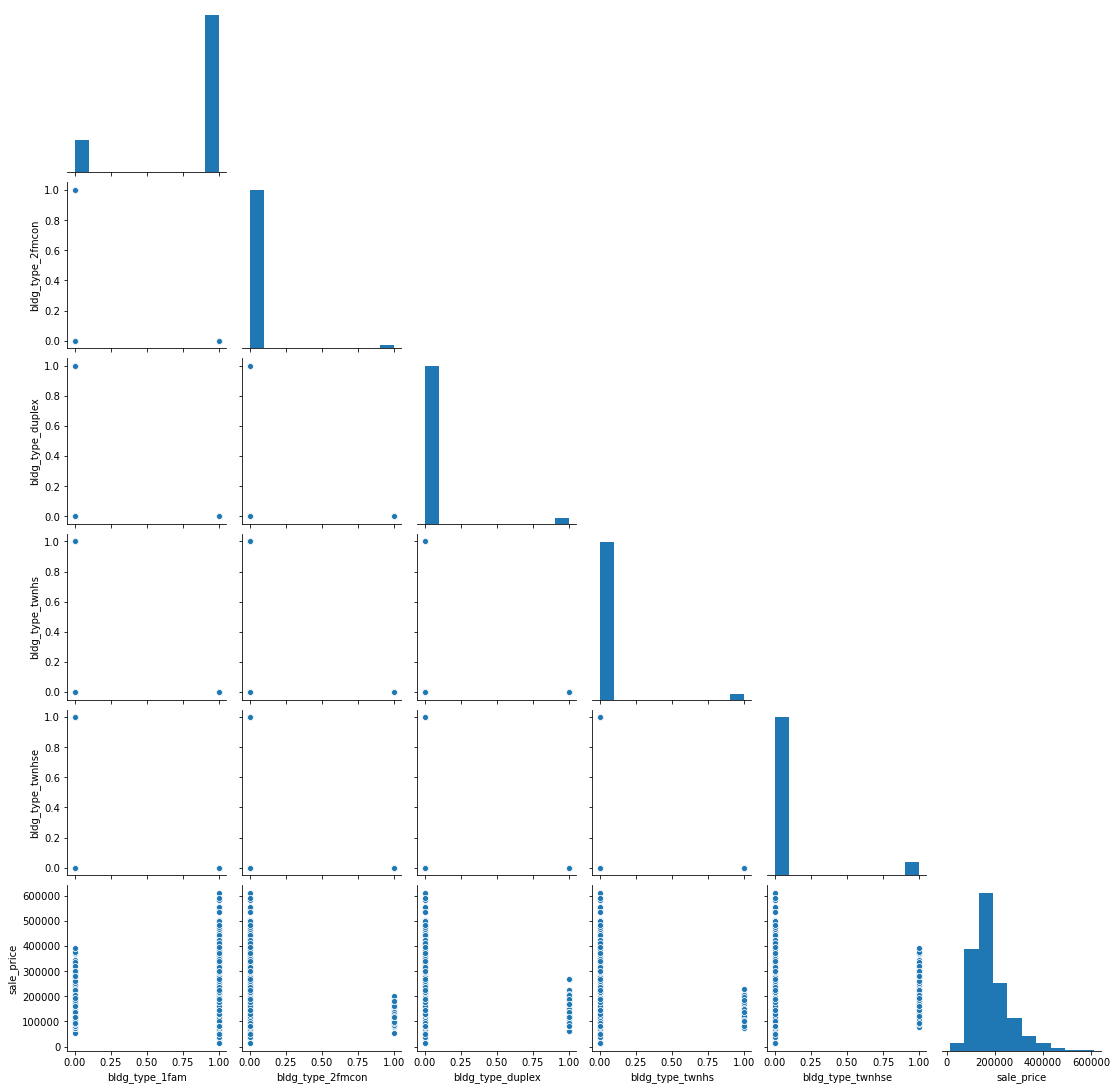

In [99]:
sns.pairplot(building_type_df, corner=True)

In [100]:
resid=y_test - y_pred

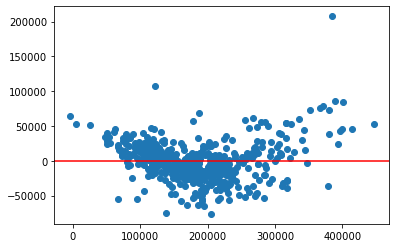

In [101]:
plt.scatter(y_pred, resid)
plt.axhline(0,color='red')


In [102]:
train_df['bldg_type_twnhse']

0       0
1       0
2       0
3       0
4       0
       ..
2046    0
2047    0
2048    0
2049    0
2050    0
Name: bldg_type_twnhse, Length: 2049, dtype: int64

In [103]:
bldg_type = train_df[['bldg_type_1fam', 'bldg_type_2fmcon', 'bldg_type_duplex','bldg_type_twnhs', 'bldg_type_twnhse']]

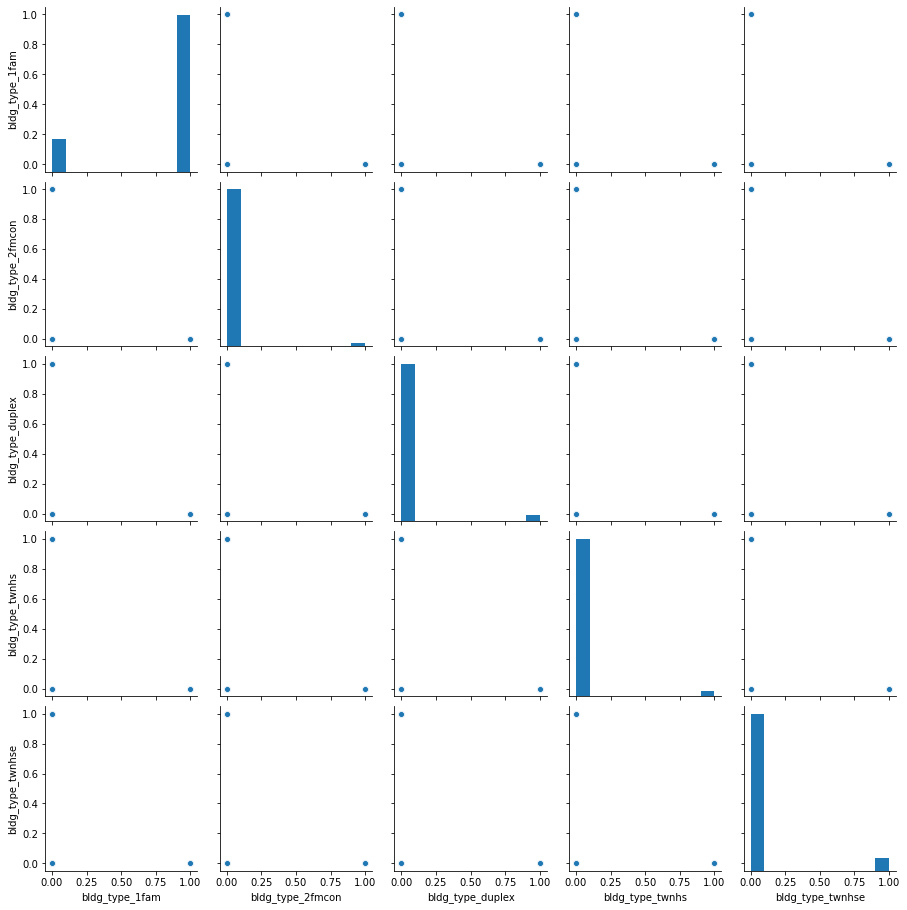

In [104]:
sns.pairplot(bldg_type)

In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
X = train_df[['sale_price']]
y = train_df['bldg_type_duplex']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [108]:
logreg = LogisticRegression()

# Step 3: Fit our model.
logreg.fit(X_train, y_train) # fit logreg with our training datasets

print(f'Logistic Regression Intercept: {logreg.intercept_}')
print(f'Logistic Regression Coefficient: {logreg.coef_}')

Logistic Regression Intercept: [-1.59272274e-10]
Logistic Regression Coefficient: [[-2.21015011e-05]]


In [109]:
logreg.predict(X_test)[:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [110]:
np.round(logreg.predict_proba(X_test), 3)

array([[0.931, 0.069],
       [0.999, 0.001],
       [0.895, 0.105],
       ...,
       [0.999, 0.001],
       [0.919, 0.081],
       [0.996, 0.004]])

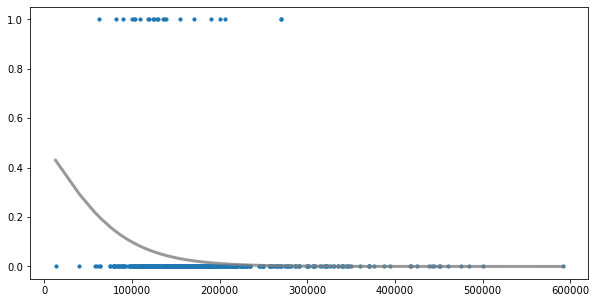

In [111]:
plt.figure(figsize = (10, 5))

plt.scatter(X_test, y_test, s = 10);

plt.plot(X_test.sort_values('sale_price'),
         logreg.predict_proba(X_test.sort_values('sale_price'))[:,1],
         color = 'grey', alpha = 0.8, lw = 3)

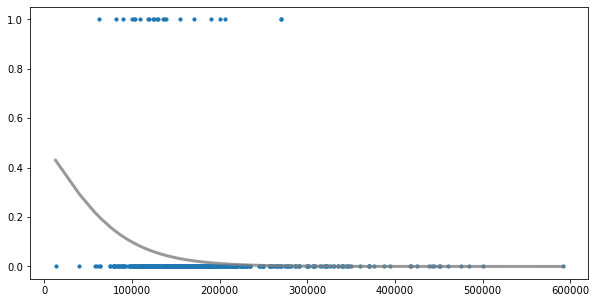

In [112]:
plt.figure(figsize = (10, 5))

plt.scatter(X_test, y_test, s = 10);

plt.plot(X_test.sort_values('sale_price'),
         logreg.predict_proba(X_test.sort_values('sale_price'))[:,1],
         color = 'grey', alpha = 0.8, lw = 3)

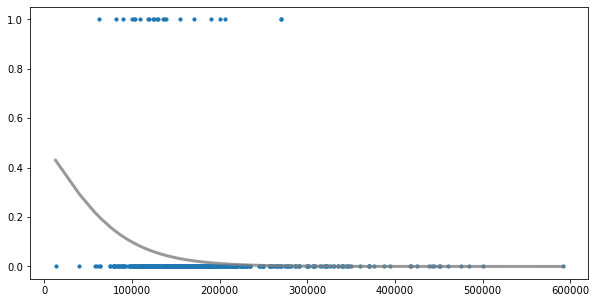

In [113]:
plt.figure(figsize = (10, 5))

plt.scatter(X_test, y_test, s = 10);

plt.plot(X_test.sort_values('sale_price'),
         logreg.predict_proba(X_test.sort_values('sale_price'))[:,1],
         color = 'grey', alpha = 0.8, lw = 3)

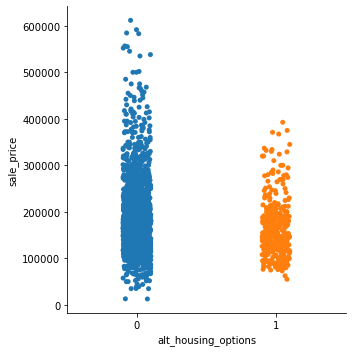

In [114]:
sns.catplot(x='alt_housing_options', y='sale_price', data=train_df,)

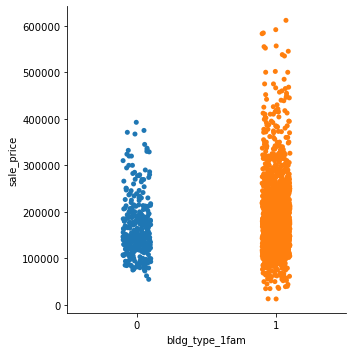

In [115]:
sns.catplot(x='bldg_type_1fam', y='sale_price', data=train_df,)

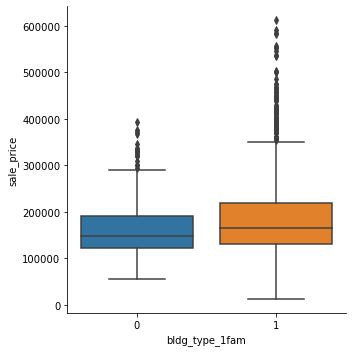

In [116]:

sns.catplot(x='bldg_type_1fam', y='sale_price', data=train_df, kind="box", )

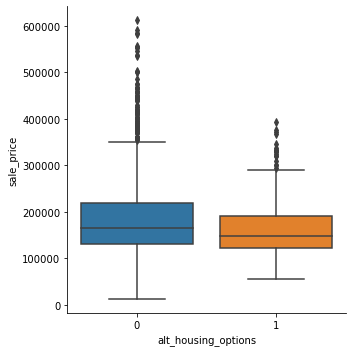

In [117]:
sns.catplot(x='alt_housing_options', y='sale_price', data=train_df, kind="box", )